In [2]:
import plotly.express as px
# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output


In [3]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [4]:
# Load (downloaded) survival data 
fname = 'Overall_ .txt'
df_surv = pd.read_csv(fname, header=2, sep='\t')

print(df_surv.shape)
df_surv.head()



(350, 6)


,Case ID,Study ID,Number at Risk,Status,Survival Rate,Time (months)
0,TCGA-GF-A6C8,skcm_tcga_pan_can_atlas_2018,145,censored,1,2.0383338265
1,TCGA-ER-A19J,skcm_tcga_pan_can_atlas_2018,144,deceased,0.9930555555555556,6.4437649998
2,TCGA-D9-A1JX,skcm_tcga_pan_can_atlas_2018,143,deceased,0.9861111111111112,7.1012920406
3,TCGA-QB-A6FS,skcm_tcga_pan_can_atlas_2018,142,censored,0.9861111111111112,7.2327974487999995
4,TCGA-FS-A1Z7,skcm_tcga_pan_can_atlas_2018,141,deceased,0.9791174152876281,7.7916954335


In [5]:
# Clean data

## Replace status values
df_surv = df_surv.replace({'Status': {'censored': 0, 'deceased': 1}})

## Remove rows with null or string values
# df_surv['Time (months)'].astype(float)
print(df_surv[df_surv['Time (months)'].isnull()])

df_surv_clean = df_surv[df_surv['Status'].notnull() & (df_surv['Status'] != 'Status')].copy()

df_surv_clean['Time (months)'] = df_surv_clean['Time (months)'].astype(float)
df_surv_clean['Status'] = df_surv_clean['Status'].astype(int)

             Case ID Study ID Number at Risk Status Survival Rate  \
145  Unaltered group      NaN            NaN    NaN           NaN   

    Time (months)  
145           NaN  


In [36]:

index

175

In [26]:
# Split into groups
df_surv_clean = df_surv_clean.assign(groups='Altered')

index = df_surv.shape[0] // 2
df_surv_clean.loc[:index, 'groups'] = 'WT' 
i1 = list(df_surv_clean['groups'] == 'Altered')      ## group i1 , having the pandas series  for the 1st cohort
i2 = list(df_surv_clean['groups'] == 'WT')     ## group i2 , having the pandas series  for the 2nd cohort
i1;

In [32]:
## Compute durations and events
## fit the model for 1st cohort
durations = df_surv_clean['Time (months)']
event_observed = df_surv_clean['Status']

event_observed;
# durations.isnull().any()

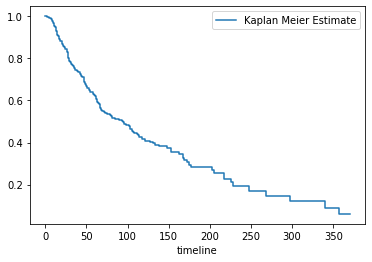

In [33]:
## create a kmf object for ALL data
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed, label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

In [34]:
durations[i2]

0       2.038334
1       6.443765
2       7.101292
3       7.232797
4       7.791695
         ...    
171    13.906697
172    13.939573
173    13.972450
174    14.136831
175    14.432719
Name: Time (months), Length: 174, dtype: float64

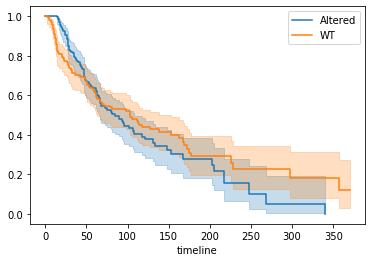

In [37]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

kmf1.fit(durations[i1], event_observed[i1], label='Altered')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(durations[i2], event_observed[i2], label='WT')
kmf1.plot(ax=a1)

In [ ]:
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')